# Shared Bikes Demand Prediction Case Study

### Problem Statement:

A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.


- How well those variables describe the bike demands


**Multiple Linear Regression**

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
# reading DataFrame.
df=pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# checking for NaNs value.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# The column instant is set for index.
df=df.set_index('instant',drop=True)
df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


Since the information dteday can be found in columns yr,mnth and weakday,hence we drop it.
Since casual and regesterd information is summed up to get cnt column which is a target variable, even droping those.

In [6]:
# droping the columns
df=df.drop(['casual','registered','dteday'],axis=1)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341


In [7]:
# continuous variables
cont_var=df.iloc[:,7:]
cont_var

,temp,atemp,hum,windspeed,cnt
instant,,,,,
1,14.110847,18.18125,80.5833,10.749882,985
2,14.902598,17.68695,69.6087,16.652113,801
3,8.050924,9.47025,43.7273,16.636703,1349
4,8.200000,10.60610,59.0435,10.739832,1562
5,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
726,10.420847,11.33210,65.2917,23.458911,2114
727,10.386653,12.75230,59.0000,10.416557,3095
728,10.386653,12.12000,75.2917,8.333661,1341


In [8]:
# catagorical variables
cat_var=df.iloc[:,:7]
cat_var

,season,yr,mnth,holiday,weekday,workingday,weathersit
instant,,,,,,,
1,1,0,1,0,6,0,2
2,1,0,1,0,0,0,2
3,1,0,1,0,1,1,1
4,1,0,1,0,2,1,1
5,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2
727,1,1,12,0,5,1,2
728,1,1,12,0,6,0,2


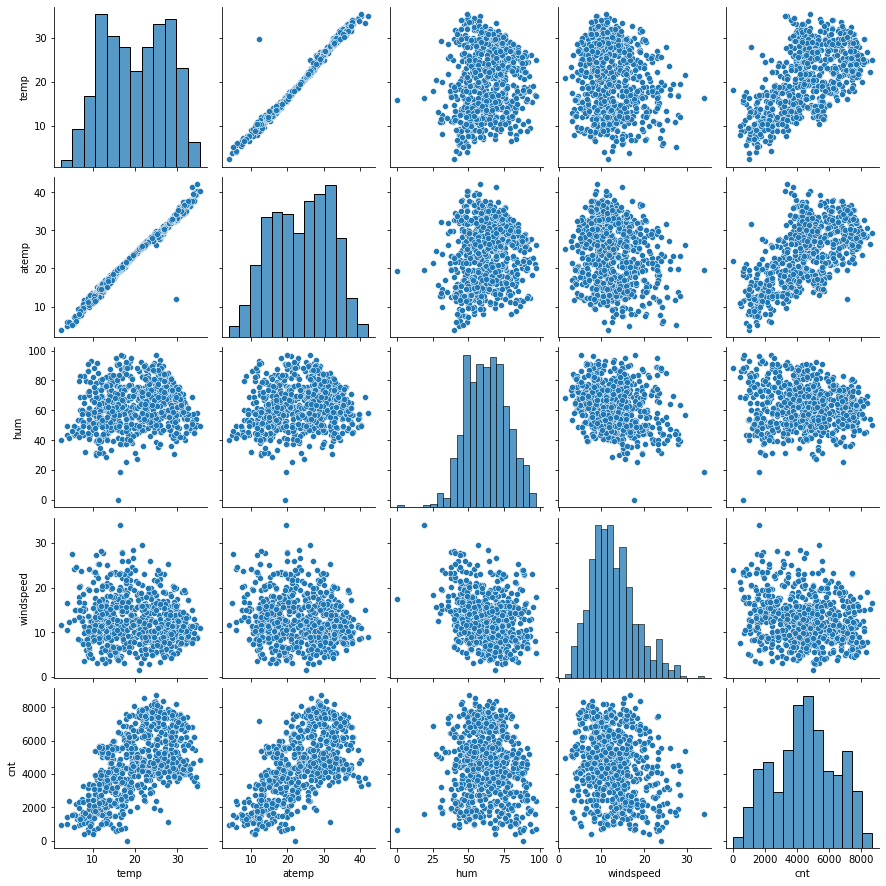

In [9]:
# Visualising the pattern for the continuous variables
sns.pairplot(cont_var)
plt.show()

In [10]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

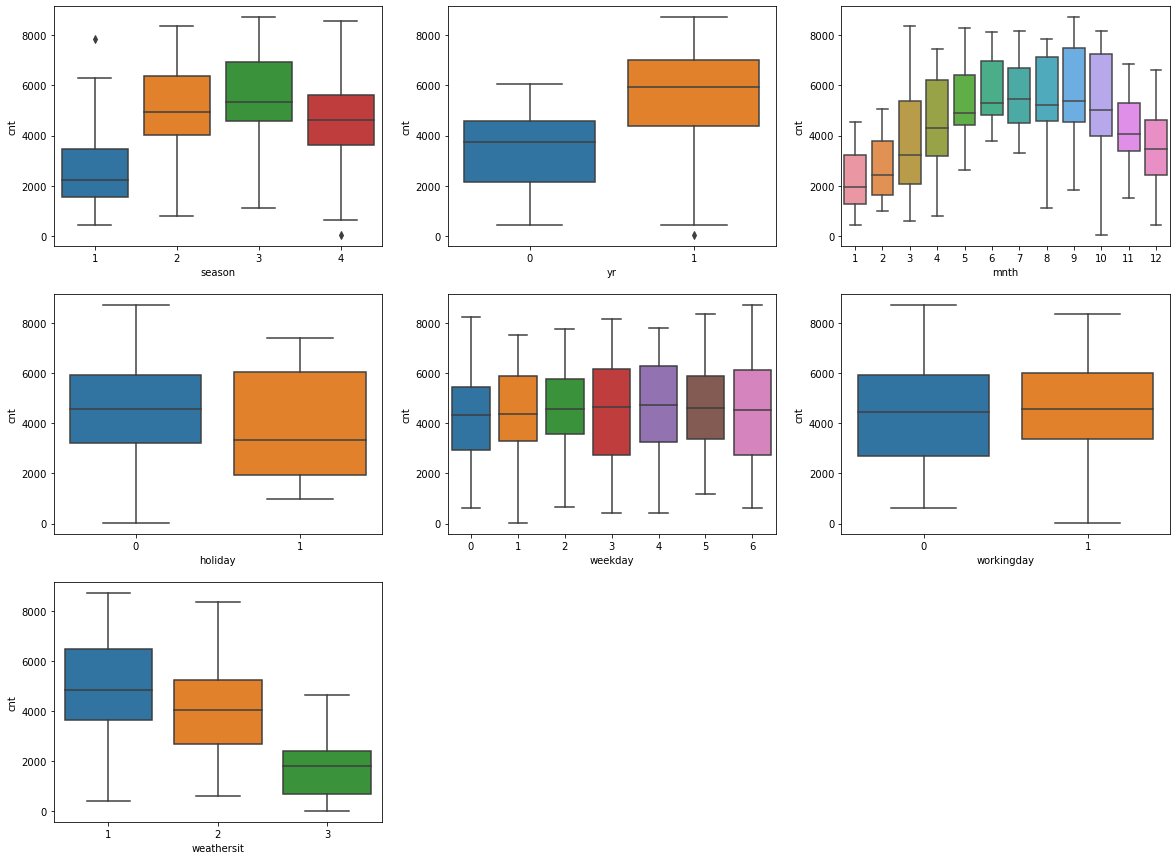

In [11]:
# Visualising the pattern for the catagorical variables.
plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.boxplot(y='cnt',x='season',data=df)
plt.subplot(3,3,2)
sns.boxplot(y='cnt',x='yr',data=df)
plt.subplot(3,3,3)
sns.boxplot(y='cnt',x='mnth',data=df)
plt.subplot(3,3,4)
sns.boxplot(y='cnt',x='holiday',data=df)
plt.subplot(3,3,5)
sns.boxplot(y='cnt',x='weekday',data=df)
plt.subplot(3,3,6)
sns.boxplot(y='cnt',x='workingday',data=df)
plt.subplot(3,3,7)
sns.boxplot(y='cnt',x='weathersit',data=df)
plt.show()

**Since columns season, mnth, weekday, weathersit has more than 2 levels, we need to encode these columns using dummy variables.**

In [12]:
# creating dummy variables
df=pd.get_dummies(data=df,columns=['season','mnth','weekday','weathersit'],drop_first=True)
df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,1,0,0,1,0
727,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,1,0,1,0
728,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,1,1,0


Splitting the DF into train and test DF

In [13]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
true_cnt=df_train['cnt']
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,13.803347,16.09770,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,1,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,1,0,0,0,0,0,1,1,0


In [14]:
# scalling the continuous scalar using minmaxscalar
scaler=MinMaxScaler()

In [15]:
var=['temp', 'atemp','hum', 'windspeed', 'cnt']

In [16]:
df_train[var]=scaler.fit_transform(df_train[var])
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,1,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,...,0,1,0,0,0,0,0,1,1,0


In [17]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


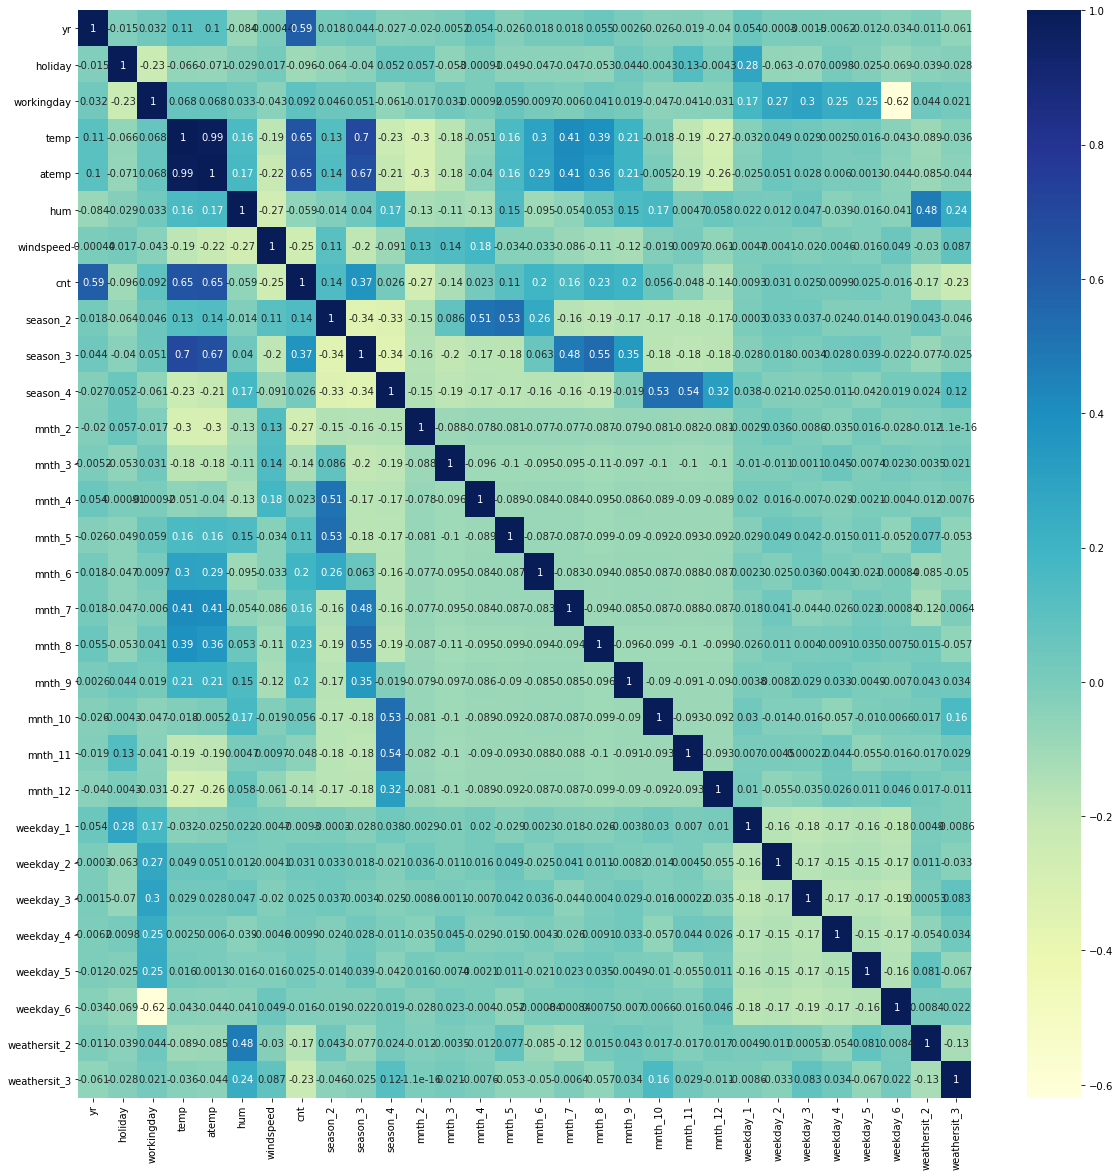

In [18]:
# visualizing corretation for df using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [19]:
# creating target and predictor variable from train daat set
y_train=df_train.pop('cnt')

In [20]:
X_train=df_train

In [21]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
427,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
729,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,1,0.863973,0.824359,0.679690,0.187140,0,1,0,...,0,0,0,0,0,1,0,0,0,0
54,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,0,...,0,0,0,0,1,0,0,0,0,0
351,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,1,0,0,0,0,0,1,1,0


**Creating linear Regression Model using SciKit learn.**

In [22]:
# initialising lr model
lr=LinearRegression()

In [23]:
# fitting lr model
lr=lr.fit(X_train,y_train)

In [24]:
#initialising Recursive Feature Elimination for automation.
rfe=RFE(lr,10)

In [25]:
# fitting RFE
rfe=rfe.fit(X_train,y_train)

In [26]:
# checking for eliminated columns.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 16),
 ('weekday_2', False, 17),
 ('weekday_3', False, 19),
 ('weekday_4', False, 20),
 ('weekday_5', False, 18),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [27]:
# updating X_trian data set with the columns as sugested by RFE
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,
577,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
427,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
729,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
483,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
112,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
579,1,0,0.863973,0.679690,0.187140,0,0,1,0,0
54,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
351,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


In [28]:
# adding constant
X_train_sm=sm.add_constant(X_train_rfe)
X_train_sm

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,,
577,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0
427,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
729,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
483,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
112,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,1,0,0.863973,0.679690,0.187140,0,0,1,0,0
54,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
351,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


**Creating Linear Regression Model using StatsModels.**

In [29]:
# fitting lr model
lr=sm.OLS(y_train,X_train_sm).fit()

In [30]:
# checking the summary.
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.02e-186
Time:                        22:56:23   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2755      0.026     10.547      0.000       0.224       0.327
yr               0.2264      0.008     27.262      0.000       0.210       0.243
holiday         -0.0893      0.026     -3.409      0.001      -0.141      -0.038
temp             0.5660      0.022     25.833      0.000       0.523       0.609
hum             -0.2848      0.032     -9.026      0.000      -0.347      -0.223
windspeed       -0.2012      0.026     -7.729      0.000      -0.252      -0.150
season_2         0.1011      0.011      9.084      0.000       0.079       0.123
season_4         0.1508      0.011     13.840      0.000       0.129       0.172
mnth_8           0.0496      0.017      2.973      0.003       0.017       0.082
mnth_9           0.1190      0.017      7.174      0.000       0.086       0.152
weathersit_3    -0.1916      0.026     -7.496      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       56.891   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.867
Skew:                          -0.673   Prob(JB):                     1.03e-23
Kurtosis:                       4.781   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# for better interpretation of coluns checking for Varience Influence Factor
vif=pd.DataFrame()
vif['columns']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,columns,vif
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


**Now the p value for all the variables are significant but vif for `hum`and `temp` is redundent, droping the high redundent variable first.**

In [32]:
# droping and rebuiding the model and checking its summary
X_train_rfe=X_train_rfe.drop('hum',axis=1)
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          1.39e-171
Time:                        22:56:23   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181      0.000       0.056       0.124
yr               0.2332      0.009     26.169      0.000       0.216       0.251
holiday         -0.0848      0.028     -3.005      0.003      -0.140      -0.029
temp             0.5464      0.023     23.262      0.000       0.500       0.593
windspeed       -0.1427      0.027     -5.252      0.000      -0.196      -0.089
season_2         0.0905      0.012      7.588      0.000       0.067       0.114
season_4         0.1316      0.012     11.430      0.000       0.109       0.154
mnth_8           0.0394      0.018      2.196      0.029       0.004       0.075
mnth_9           0.1002      0.018      5.650      0.000       0.065       0.135
weathersit_3    -0.2520      0.027     -9.483      0.000      -0.304      -0.200
==============================================================================
Omnibus:                       63.117   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.174
Skew:                          -0.757   Prob(JB):                     7.23e-25
Kurtosis:                       4.714   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# checking for vif
vif=pd.DataFrame()
vif['columns']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i)for i in range(X_train_rfe.shape[1])]
vif=vif.round(2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,columns,vif
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


**Now the p values for all the variables are significant and even vif is better i.e, less than 5, hence the Linear Regression Model is finalised.**

## Resudial Analysis

In [34]:
# getting predicted values from model.
y_train_pred=lr.predict(X_train_sm)

In [35]:
# r-squared value.
r2_score(y_train,y_train_pred)

0.8056780165818268

In [36]:
# Resudial values
res=y_train-y_train_pred

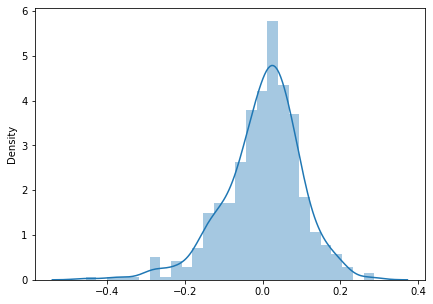

In [37]:
# plotting distrubtion plot for resudials
plt.figure(figsize=[7,5])
sns.distplot(res)
plt.show()

**As we can see the curve looks like normally distrubuted with mean zero. Hence our model is inline with the assumption that the error follows the normal distrubution.**

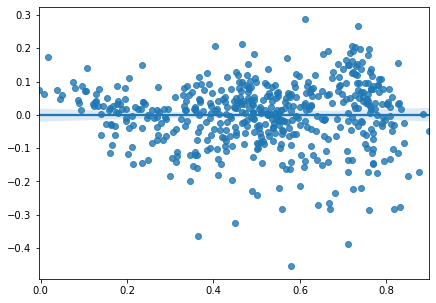

In [38]:
# checking for any variance pattern among resudials.
plt.figure(figsize=[7,5])
sns.regplot(y_train_pred,res)
plt.show()

**Since we can see any pattern among the resudials, our lr model is inline with the assumptions that errors are independent to each other.**

Hence our model holds good for the assumptions of simple linear regression were:
1. Linear relationship between X and Y.
2. Error terms are normally distributed.
3. Error terms are independent of each other.
4. Error terms have constant variance (homoscedasticity).


## Model Evaluation

**Now we validate our model using test dataframe.**

In [39]:
# test DataFrame
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
536,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
300,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
222,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
153,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,1,0,1,0,0,0,0,0,0
128,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,1,0,...,0,0,0,0,0,0,0,0,0,0
641,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# transforming the test data.
df_test[var]=scaler.transform(df_test[var])
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
536,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
300,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
222,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
153,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,1,0,1,0,0,0,0,0,0
128,0,0,0,0.584649,0.577380,0.650923,0.069510,0.495973,1,0,...,0,0,0,0,0,0,0,0,0,0
641,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_test=df_test.pop('cnt')

In [43]:
X_test=df_test

In [44]:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
185,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,1,0,0,0,0,0,1,0
536,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,0,0,0,1,0,0,0,0,0
300,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,1,0,0,1,0
222,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,0,1,0,0,0,0,0
153,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1.0,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,...,0,1,0,1,0,0,0,0,0,0
128,1.0,0,0,0,0.584649,0.577380,0.650923,0.069510,1,0,...,0,0,0,0,0,0,0,0,0,0
641,1.0,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# assigning required columns from the train data set.
X_test_sm=X_test_sm[X_train_sm.columns]
X_test_sm

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
instant,,,,,,,,,,
185,1.0,0,1,0.831783,0.084219,0,0,0,0,0
536,1.0,1,0,0.901354,0.153728,1,0,0,0,0
300,1.0,0,0,0.511964,0.334206,0,1,0,0,0
222,1.0,0,0,0.881625,0.339570,0,0,1,0,0
153,1.0,0,0,0.817246,0.537414,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
703,1.0,1,0,0.519232,0.283397,0,1,0,0,0
128,1.0,0,0,0.584649,0.069510,1,0,0,0,0
641,1.0,1,0,0.745598,0.052115,0,1,0,0,0


## Results and Conclusions.

In [46]:
# looking for the prediction values
y_test_pred=lr.predict(X_test_sm)

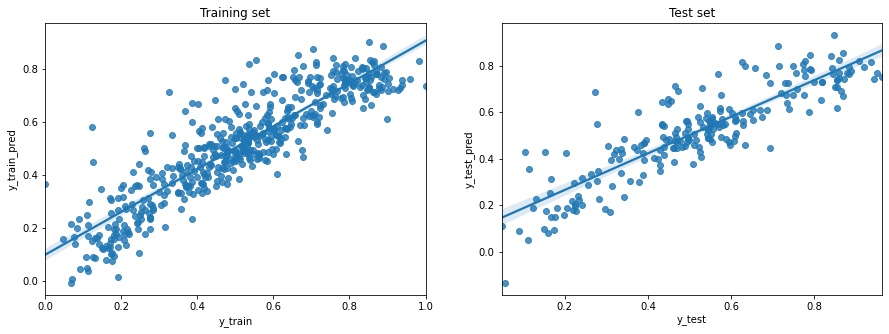

In [47]:
# regression model with predicted values
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.regplot(y_train,y_train_pred)
plt.title('Training set')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.subplot(1,2,2)
sns.regplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Test set')
plt.show()

In [48]:
# r-squared value
r2_score(y_test,y_test_pred)

0.7731388699761521

In [49]:
r2_score(y_train,y_train_pred)

0.8056780165818268

**Thus, for the model with 9 variables, the r-squared on training and test data is about 80.56% and 77.3% respectively. The adjusted r-squared on the train set is about is about 80.2%.**

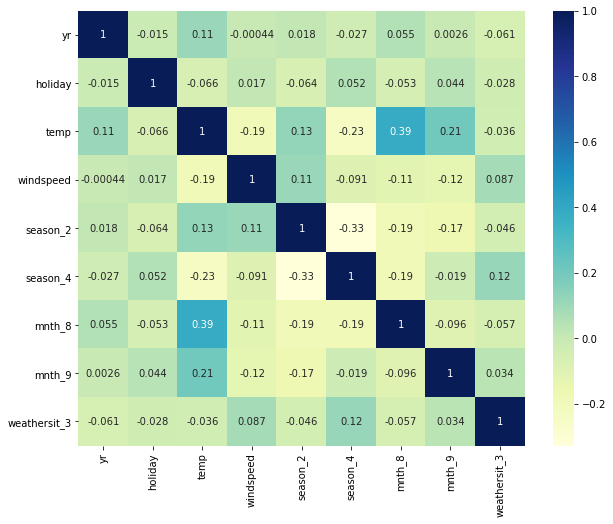

In [50]:
# plotting correlation
plt.figure(figsize=[10,8])
sns.heatmap(X_train_rfe.corr(),cmap="YlGnBu", annot=True)
plt.show()

**This is the simplest model that we could build. The final predictors seem to have fairly low correlations.**

**Thus, the final model consists of the 9 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.**